Mouted drive to save and retrive file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


REQUIRED LIBRARIES


In [ ]:
import re
import spacy
import numpy as np
import pandas as pd
import seaborn as sns

import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_score, recall_score

reading csv

In [ ]:
temp=pd.read_csv('/content/gdrive/MyDrive/data/tweets_combined.csv')
df = temp.drop(columns=["Unnamed: 0"])  


In [ ]:
len(df)

9539

In [ ]:
df.shape

(9539, 2)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9539 entries, 0 to 9538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   9539 non-null   object
 1   target  9539 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


checking type

In [ ]:
df.dtypes

tweet     object
target     int64
dtype: object

Here, 1 represents a depress tweet while 0 represents a non-depress tweet.

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].value_counts(normalize = True)

1    0.881434
0    0.118566
Name: target, dtype: float64

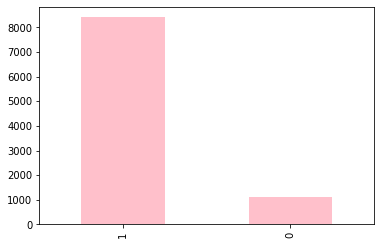

In [ ]:
df['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

#Pre-proccesing 

In [ ]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)




In [ ]:
#remove emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

#remove url
def remove_URL(sample):
  
    return re.sub(r"http\S+", "", sample)
    
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
            #remove hashtag, @mention, emoji and image URLs
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            
            #expand contraction
        tweet = expandContractions(tweet)

        tweet = remove_URL(tweet)

        tweet = deEmojify(tweet)
      
        
        cleaned_tweets.append(tweet)

    return cleaned_tweets



In [ ]:
df['clean_tweet']=clean_tweets(df['tweet'])

In [ ]:
df['clean_tweet'].replace('', np.nan, inplace=True, limit=(len(df)))

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(9538, 3)

In [ ]:
df.head(30)

,tweet,target,clean_tweet
0,"Was planning to head up to Scotland this week,...",1,"Was planning to head up to Scotland this week,..."
1,@LemonieSays same!!! I can't wait to focus sol...,1,same!!! I cannot wait to focus soley on teachi...
2,i farmed for 160 primos and got another bennet...,1,i farmed for 160 primos and got another bennet...
3,@TianaTait I meant to let's have a walk and ki...,1,I meant to let us have a walk and kill the hea...
4,@Benmorris04 happy birthday big man 👀😂⚽️,0,happy birthday big man
5,If you've tried antidepressants and they have ...,1,If you have tried antidepressants and they hav...
6,@mycharlibrown @pcbcat43 Happy birthday Mom wh...,0,Happy birthday Mom what a wonderful cake deliv...
7,It’s so hard to be honest about how you feel w...,1,It’s so hard to be honest about how you feel w...
8,"@AdekolaAkani You've moved on, no need to stre...",1,"You've moved on, no need to stress yourself ab..."
9,@JucikaDaily That was a stress egg. Those are ...,1,That was a stress egg. Those are no good.


convert text to lowercase

In [ ]:
df['clean_tweet']= df['clean_tweet'].str.lower()

Remove numbers

In [ ]:
df['clean_tweet']= df['clean_tweet'].str.replace("[0-9]"," ")

remove whitespaces

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:' '.join(x.split()))

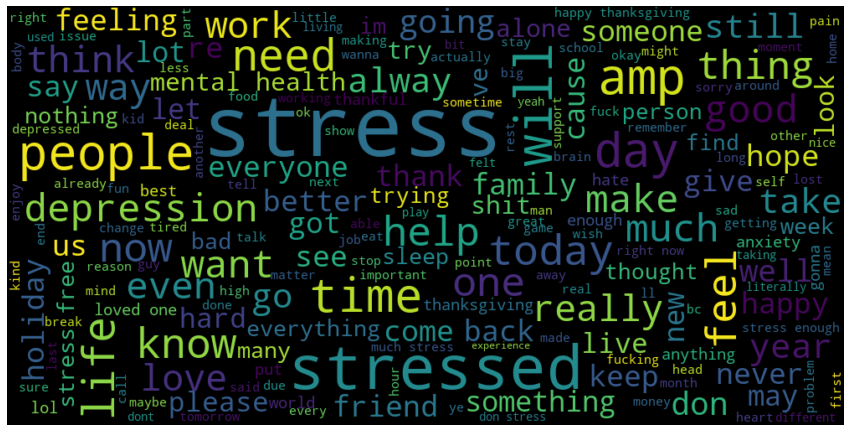

In [ ]:
words  =  " ".join([sentence for sentence in df['clean_tweet'][df['target']==1]])

wordcloud = WordCloud(width =1000, height = 500, random_state=50 ,max_font_size =100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It's easy to spot words that are indicative of depression in these tweets: depression, help,, crying, stress, therapy, mental health, emotional, bipolar.

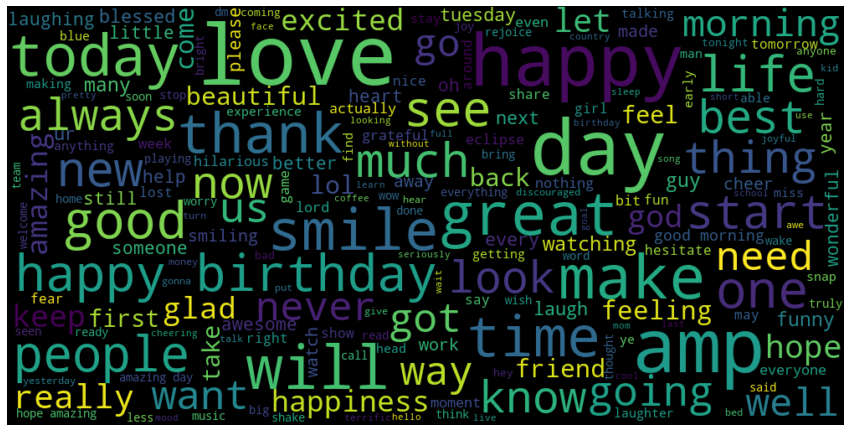

In [ ]:
words  =  " ".join([sentence for sentence in df['clean_tweet'][df['target']==0]])

wordcloud = WordCloud(width =1000, height = 500, random_state=42 ,max_font_size =100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

comparing clean and non-clean tweet

In [ ]:
df.head(5)


,tweet,target,clean_tweet
0,"Was planning to head up to Scotland this week,...",1,"was planning to head up to scotland this week,..."
1,@LemonieSays same!!! I can't wait to focus sol...,1,same!!! i cannot wait to focus soley on teachi...
2,i farmed for 160 primos and got another bennet...,1,i farmed for primos and got another bennett in...
3,@TianaTait I meant to let's have a walk and ki...,1,i meant to let us have a walk and kill the hea...
4,@Benmorris04 happy birthday big man 👀😂⚽️,0,happy birthday big man


#ELMo

In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15


     |████████████████████████████████| 412.3 MB 19 kB/s 
     |████████████████████████████████| 503 kB 43.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 3.8 MB 56.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c7e04d699ddfa117f01556e28d5c97b7167a952a30b9c71279150efe8e5933a0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

ELMo

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

batch of 100

In [ ]:
list_tweet = [df[i:i+100] for i in range(0,df.shape[0],100)]

In [ ]:
elmo_tweet = [elmo_vectors(x['clean_tweet']) for x in list_tweet]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
elmo_tweet_new = np.concatenate(elmo_tweet, axis = 0)

saving ELMo result in pickle

In [ ]:
import pickle
pickle_out = open("elmo_tweet.pickle","wb")
pickle.dump(elmo_tweet_new, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("elmo_tweet.pickle", "rb")
elmo_tweet_new = pickle.load(pickle_in)

#ML Models

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train , y_test= train_test_split(elmo_tweet_new,df['target'], random_state=42 , test_size=.05)

LogisticRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000,class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.89      0.58        62
           1       0.98      0.82      0.89       415

    accuracy                           0.83       477
   macro avg       0.70      0.85      0.73       477
weighted avg       0.91      0.83      0.85       477



Bernoulli Naive Bayes

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


BernoulliNB()

In [ ]:
y_pred1 = BNBmodel.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.22      0.71      0.34        62
           1       0.94      0.62      0.75       415

    accuracy                           0.64       477
   macro avg       0.58      0.67      0.54       477
weighted avg       0.84      0.64      0.69       477



Linear SVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
y_pred2 = SVCmodel.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        62
           1       0.93      0.96      0.95       415

    accuracy                           0.91       477
   macro avg       0.81      0.74      0.77       477
weighted avg       0.90      0.91      0.90       477



custom text predict

In [ ]:
def elmo_vectors_word(x):
  embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
x = ["finally i got new car happy today"]
print(y)
l = elmo_vectors_word(y)


['finally i get new car happy today']
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
print(l)

[[-0.2835002  -0.25829625 -0.16698392 ...  0.00505269 -0.0187325
   0.02420865]]


In [ ]:
b = SVCmodel.predict(l)
print(b)


[0]


In [ ]:
b = BNBmodel.predict(l)
print(b)

[1]


In [ ]:
b = model.predict(l)
print(b)

[0]


In [ ]:
accuracies = []
f1_scores = []
precisions = []
recalls = []

models_name = ['Logistic Regression', 'BNB', 'SVC']
y_preds = [pred, y_pred1, y_pred2]


for idx, (name, pred) in enumerate(zip(models_name, y_preds)):
  accuracies.append(accuracy_score(y_test, pred))
  f1_scores.append(f1_score(y_test, pred, average='weighted'))
  precisions.append(precision_score(y_test, pred, average='weighted'))
  recalls.append(recall_score(y_test, pred, average='weighted'))

In [ ]:
compare_df = pd.DataFrame.from_dict({
    'name': models_name,
    'accuracy': accuracies,
    'f1_score': f1_scores,
    'precision': precisions,
    'recall': recalls
})

compare_df

,name,accuracy,f1_score,precision,recall
0,Logistic Regression,0.830189,0.852517,0.907938,0.830189
1,BNB,0.635220,0.694916,0.842081,0.635220
2,SVC,0.905660,0.900006,0.897818,0.905660


[]

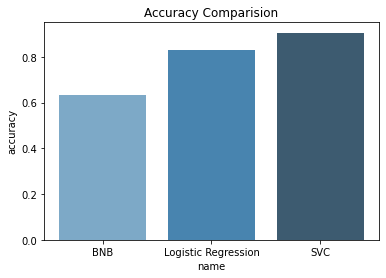

In [ ]:
sns.barplot(
    x='name', 
    y='accuracy',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('accuracy').name
)
plt.title('Accuracy Comparision')
plt.plot()

[]

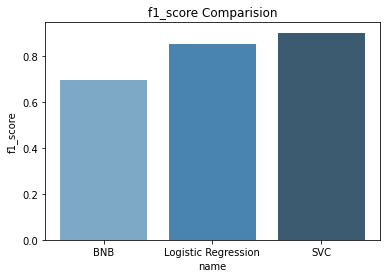

In [ ]:
sns.barplot(
    x='name', 
    y='f1_score',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('f1_score').name
)
plt.title('f1_score Comparision')
plt.plot()

[]

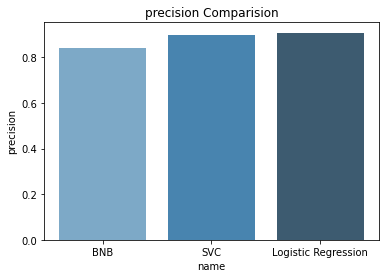

In [ ]:
sns.barplot(
    x='name', 
    y='precision',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('precision').name
)
plt.title('precision Comparision')
plt.plot()

[]

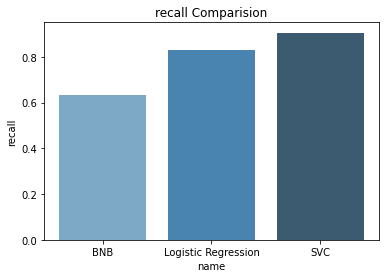

In [ ]:
sns.barplot(
    x='name', 
    y='recall',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('recall').name
)
plt.title('recall Comparision')
plt.plot()

#BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
bow.shape

(9538, 1000)

#ML model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train , y_test= train_test_split(bow,df['target'], random_state=42 , test_size=.05)

LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000,class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.89      0.58        62
           1       0.98      0.83      0.90       415

    accuracy                           0.83       477
   macro avg       0.71      0.86      0.74       477
weighted avg       0.91      0.83      0.86       477



Bernoulli Naive Bayes

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


BernoulliNB()

In [ ]:
y_pred1 = BNBmodel.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.37      0.66      0.47        62
           1       0.94      0.83      0.88       415

    accuracy                           0.81       477
   macro avg       0.65      0.75      0.68       477
weighted avg       0.87      0.81      0.83       477



linear SVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
y_pred2 = SVCmodel.predict(x_test)
f1_score(y_test,y_pred2)

0.9320619785458879

In [ ]:
accuracy_score(y_test,y_pred2)

0.8805031446540881

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.55      0.47      0.50        62
           1       0.92      0.94      0.93       415

    accuracy                           0.88       477
   macro avg       0.73      0.70      0.72       477
weighted avg       0.87      0.88      0.88       477



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
accuracies = []
f1_scores = []
precisions = []
recalls = []

models_name = ['Logistic Regression', 'BNB', 'SVC']
y_preds = [pred, y_pred1, y_pred2]


for idx, (name, pred) in enumerate(zip(models_name, y_preds)):
  accuracies.append(accuracy_score(y_test, pred))
  f1_scores.append(f1_score(y_test, pred, average='weighted'))
  precisions.append(precision_score(y_test, pred, average='weighted'))
  recalls.append(recall_score(y_test, pred, average='weighted'))

In [ ]:
compare_df = pd.DataFrame.from_dict({
    'name': models_name,
    'accuracy': accuracies,
    'f1_score': f1_scores,
    'precision': precisions,
    'recall': recalls
})

compare_df

,name,accuracy,f1_score,precision,recall
0,Logistic Regression,0.834382,0.855825,0.908911,0.834382
1,BNB,0.807128,0.828658,0.867547,0.807128
2,SVC,0.880503,0.876468,0.873428,0.880503


[]

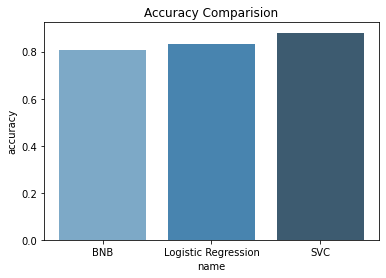

In [ ]:
sns.barplot(
    x='name', 
    y='accuracy',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('accuracy').name
)
plt.title('Accuracy Comparision')
plt.plot()

[]

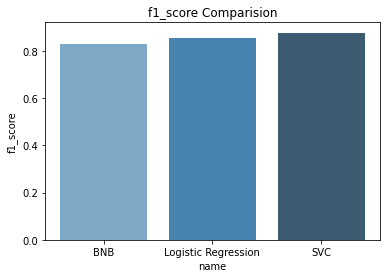

In [ ]:
sns.barplot(
    x='name', 
    y='f1_score',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('f1_score').name
)
plt.title('f1_score Comparision')
plt.plot()

[]

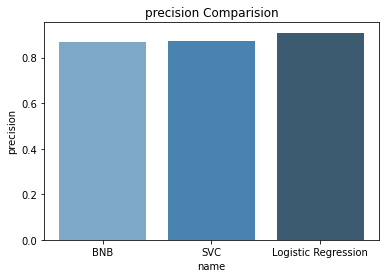

In [ ]:
sns.barplot(
    x='name', 
    y='precision',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('precision').name
)
plt.title('precision Comparision')
plt.plot()

[]

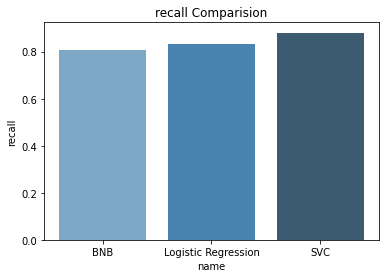

In [ ]:
sns.barplot(
    x='name', 
    y='recall',
    data=compare_df, 
    palette='Blues_d', 
    order=compare_df.sort_values('recall').name
)
plt.title('recall Comparision')
plt.plot()